In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\14694\\Documents\\Multiclass project\\healthcare\\train_data.csv")

In [3]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
data.shape

(318438, 18)

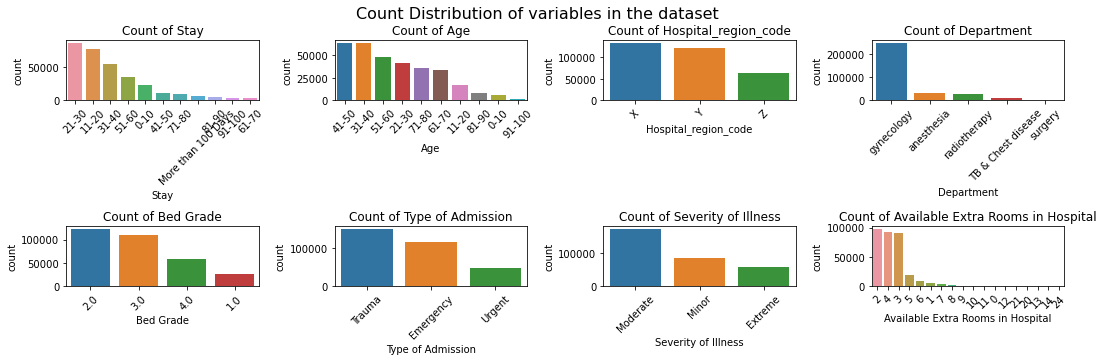

In [20]:
data_cols = ['Stay','Age','Hospital_region_code','Department','Bed Grade','Type of Admission','Severity of Illness', 'Available Extra Rooms in Hospital']


plt.figure(figsize=(15, 12))
for i, col in enumerate(data_cols):
    value_counts = data[col].value_counts().reset_index()
    sorted_counts = value_counts.sort_values(by=col, ascending=False)
    sorted_values = sorted_counts['index'].tolist()
    
    ax = plt.subplot(5,4, i+1)
    sns.countplot(data=data, x=col, ax=ax,order=sorted_values) 
    ax.set_title(f"Count of {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.suptitle("Count Distribution of variables in the dataset", fontsize=16)


plt.tight_layout(pad=1.0)

Insights from the following graphs : 

    1. Maximum distribution of stay is 21-30 days followed by 11-20 days and 31-40days
    
    2. Highest admissions belong to the 41-50, 31-40 age group and lowest from 0-10 and 91-100 days 
    
    3. Maximum patients admitted belong to the hospital region code of 'X'
    
    4. Highest patients came in from the gynecology department 
    
    5. Unfortunately, highest admissions came in for Trauma related events 
    
    6. Severity of illness involved mainly in the Moderate area - though there were a significant count of 'Extreme' Illness 
    
    7. On average, we see that there are 2,3 and 4 available extra rooms in hospital

Initial thoughts on what could correlate with high Length of Stay from features present in dataset:

1) Age 

2) Severity of Illness

3) Type of Admission

4) Department

In [30]:
stay_age_distribution = pd.get_dummies(data.loc[:,['Stay','Age']], columns=['Age']).groupby('Stay', as_index=False).sum()
stay_age_distribution

,Stay,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0-10,615.0,1552.0,3467.0,4916.0,4727.0,3427.0,2194.0,2201.0,422.0,83.0
1,11-20,1959.0,5343.0,11272.0,15792.0,14959.0,11346.0,7870.0,7958.0,1392.0,248.0
2,21-30,1489.0,4312.0,11394.0,18550.0,17906.0,13058.0,9033.0,9534.0,1920.0,295.0
3,31-40,1014.0,2681.0,6912.0,10912.0,10983.0,8569.0,5930.0,6420.0,1504.0,234.0
4,41-50,187.0,510.0,1398.0,2373.0,2507.0,1735.0,1205.0,1383.0,379.0,66.0
5,51-60,582.0,1429.0,3793.0,6517.0,7189.0,5739.0,4081.0,4433.0,1082.0,173.0
6,61-70,26.0,89.0,263.0,509.0,562.0,448.0,325.0,378.0,115.0,29.0
7,71-80,153.0,350.0,1026.0,1807.0,2146.0,1710.0,1230.0,1367.0,402.0,63.0
8,81-90,84.0,223.0,546.0,801.0,885.0,784.0,600.0,670.0,216.0,29.0
9,91-100,35.0,71.0,231.0,484.0,578.0,499.0,330.0,386.0,132.0,19.0


In [31]:
now = stay_age_distribution.columns.tolist()
now.remove('Stay')
print(now)

['Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100']


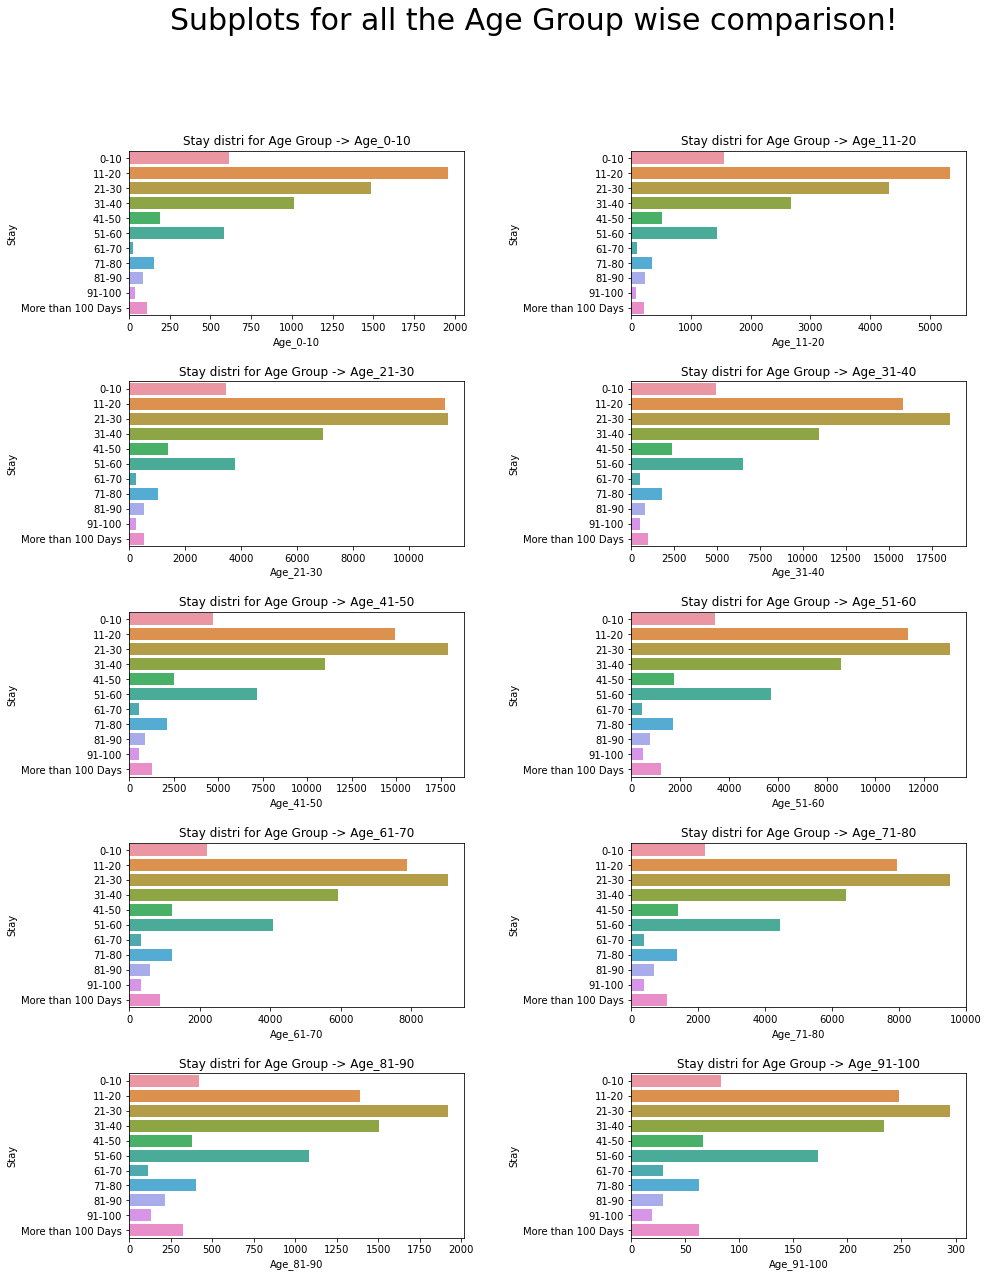

In [35]:
plt.figure(figsize=(15,20))
plt.suptitle("Subplots for all the Age Group wise comparison!", fontsize=30)
x = 1
for age in now:
    ax = plt.subplot(int(len(now)//2),2,x)
    ax = plt.subplots_adjust(wspace=0.5,hspace=0.4)
    sns.barplot(y = 'Stay',x = age,data = stay_age_distribution,ax = ax)
    plt.title(f'Stay distri for Age Group -> {age}')
    x +=1

In [38]:
stay_order = ['0-10', '11-20', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100', 'More than 100 Days']

C:\Users\14694\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\14694\AppData\Local\Temp\ipykernel_25144\4287590750.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(stay_order, rotation = 45)


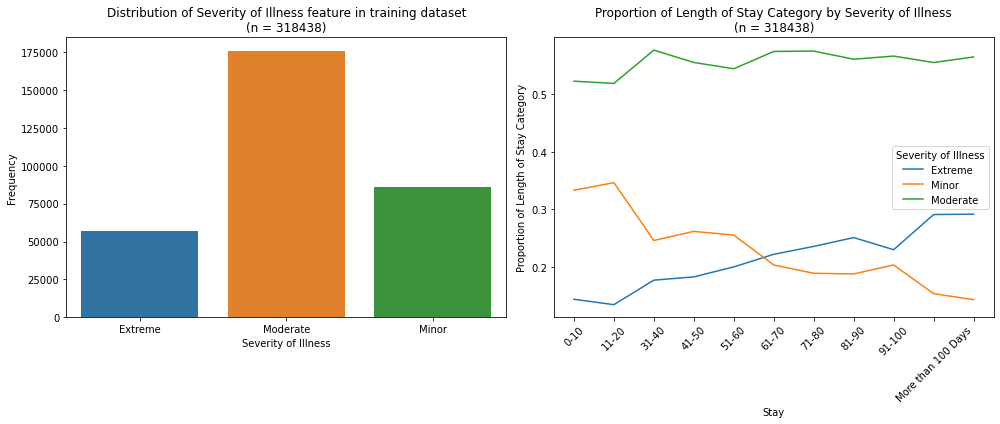

In [25]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))

# ax1 -------
sns.countplot(data["Severity of Illness"], ax = ax1)

ax1.set_title("""Distribution of Severity of Illness feature in training dataset
(n = {})""".format(len(data)))
ax1.set_ylabel("Frequency")

# ax2 -------
c = data.groupby(["Severity of Illness", "Stay"]).size()
c = (c/c.groupby(level=1).sum()).reset_index()

sns.lineplot(x = "Stay", y = 0, hue = "Severity of Illness", data = c, ax = ax2)

ax2.set_title("""Proportion of Length of Stay Category by Severity of Illness
(n = {})""".format(len(data)))
ax2.set_ylabel("Proportion of Length of Stay Category")
ax2.set_xticklabels(stay_order, rotation = 45)

plt.tight_layout()
plt.show()

We can see that the levels of extreme and minor severities of illnesses do change with a change in length of stay categories.

For longer LOS, we see that typically they have noticeably lower proportions of minor and higher extreme illnesses than shorter

LOS. Therefore, this feature would be particularly helpful in this task.

C:\Users\14694\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\14694\AppData\Local\Temp\ipykernel_25144\4163111021.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(stay_order, rotation = 45)


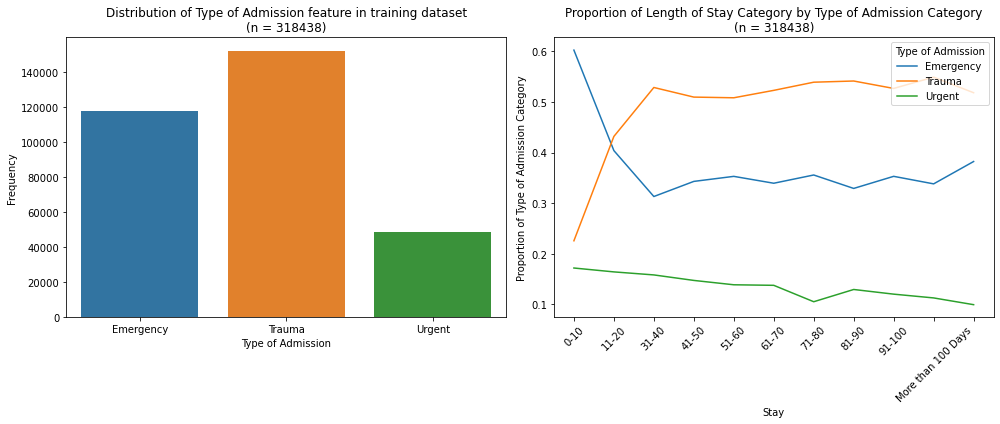

In [27]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))

# ax1 -------
sns.countplot(data["Type of Admission"], ax = ax1)

ax1.set_title("""Distribution of Type of Admission feature in training dataset
(n = {})""".format(len(data)))
ax1.set_ylabel("Frequency")

# ax2 -------
c = data.groupby(["Type of Admission", "Stay"]).size()
c = (c/c.groupby(level=1).sum()).reset_index()

sns.lineplot(x = "Stay", y = 0, hue = "Type of Admission", data = c, ax = ax2)

ax2.set_title("""Proportion of Length of Stay Category by Type of Admission Category
(n = {})""".format(len(data)))
ax2.set_ylabel("Proportion of Type of Admission Category")
ax2.set_xticklabels(stay_order, rotation = 45)

plt.tight_layout()
plt.show()

It appears that emergency and trauma admissions could be particularly to disseminate shorter LOS (e.g. 0 - 20 days) from 

longer LOS (21 + days). We also see that the proportion of urgent admissions decreasing over the LOS, which could also be 

potentially useful in the model. Overall, it is not yet clear how effective this feature will be to add in the model.

In [43]:
stay_dept_distribution = pd.get_dummies(data.loc[:,['Stay','Department']], columns=['Department']).groupby('Stay', as_index=False).sum()
stay_dept_distribution

,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery
0,0-10,791.0,1519.0,18849.0,2379.0,66.0
1,11-20,2379.0,8823.0,59690.0,6988.0,259.0
2,21-30,2618.0,8950.0,68383.0,7263.0,277.0
3,31-40,1753.0,4958.0,43535.0,4713.0,200.0
4,41-50,300.0,851.0,9671.0,879.0,42.0
5,51-60,1047.0,2527.0,27989.0,3256.0,199.0
6,61-70,76.0,173.0,2226.0,264.0,5.0
7,71-80,294.0,703.0,8165.0,1043.0,49.0
8,81-90,140.0,384.0,3748.0,528.0,38.0
9,91-100,64.0,156.0,2269.0,256.0,20.0


In [44]:
now = stay_dept_distribution.columns.tolist()
now.remove('Stay')
print(now)

['Department_TB & Chest disease', 'Department_anesthesia', 'Department_gynecology', 'Department_radiotherapy', 'Department_surgery']


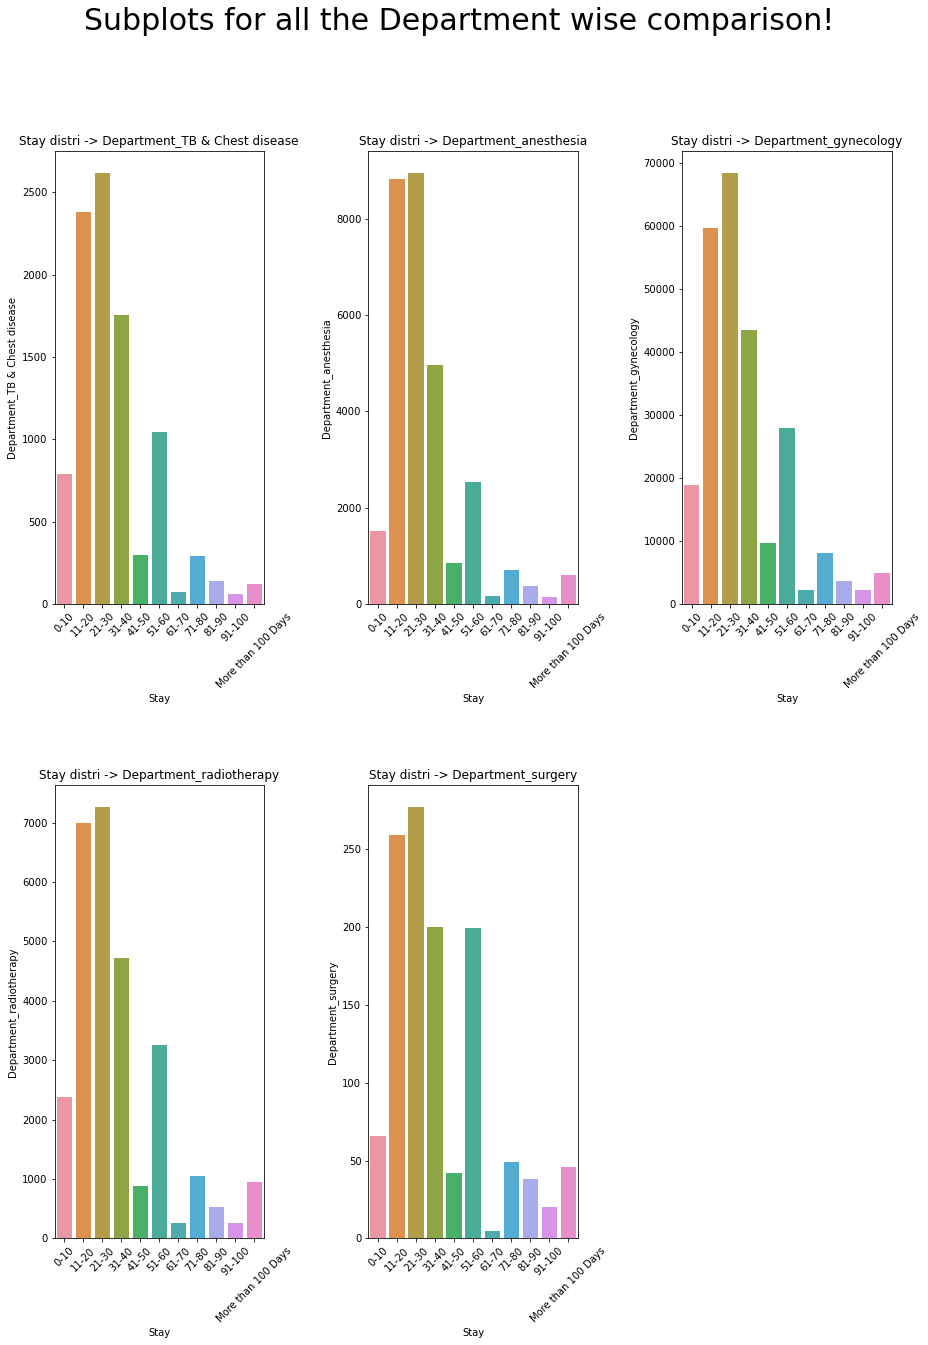

In [56]:
plt.figure(figsize=(15, 20))
plt.suptitle("Subplots for all the Department wise comparison!", fontsize=30)
x = 1
for dept in now:
    ax = plt.subplot(int(len(now) // 2), 3, x)
    plt.subplots_adjust(wspace=0.5, hspace=0.4)
    
    # Create the barplot
    sns.barplot(x='Stay', y=dept, data=stay_dept_distribution, ax=ax)
    
    # Rotate x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    plt.title(f'Stay distri -> {dept}')
    x += 1

Here we see that there is no noticeable change in distribution of cases by Department over LOS. We do see a marginal difference 

in surgery department's distribution of cases, whereby it is slightly more skewed to more longer LOS than other departments. 

This could be confounded by lack of surgery entries. 

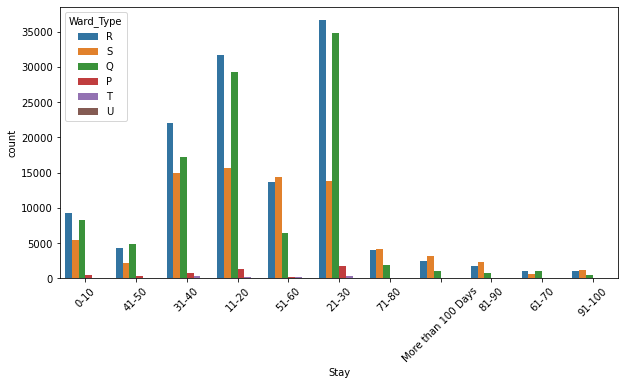

In [60]:
for i in ['Ward_Type']:

    plt.figure(figsize=(10,5))

    ax = sns.countplot(x='Stay',hue=i,data=data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


Ward type R and Q recorded the most number of patients for 21-30 Days and 11-20 Days. Ward type 'S' seems to have higher stay duration 

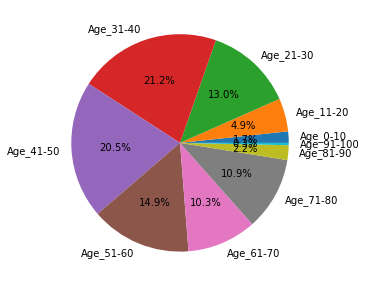

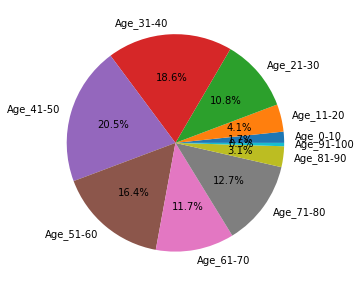

In [14]:
stay_durations = ['21-30','51-60']
stay_specific_data = stay_age_distribution[stay_age_distribution.Stay.isin(stay_durations)].reset_index(drop=True).iloc[:,1:]
for ind in stay_specific_data.index:
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    # print(stay_specific_data.iloc[ind])
    stay_specific_data.iloc[ind].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_ylabel('')
    ax.set_xlabel('')

Age 31-40 and 41-50 dominate the 1month and 2month duration stay

In [15]:
dep_stay_age_distri = data.groupby(by = ['Stay','Age','Department'])['Department'].count().reset_index(level = 1)
dep_stay_age_distri

Age  Department
Stay               Department                            
0-10               TB & Chest disease    0-10          35
                   anesthesia            0-10          41
                   gynecology            0-10         449
                   radiotherapy          0-10          80
                   surgery               0-10          10
...                                       ...         ...
More than 100 Days radiotherapy         81-90          55
                   TB & Chest disease  91-100           1
                   anesthesia          91-100           3
                   gynecology          91-100          48
                   radiotherapy        91-100          11

[529 rows x 2 columns]

In [16]:
dur_21_30 = dep_stay_age_distri[dep_stay_age_distri.index.get_level_values('Stay').isin([stay_durations[0]])].rename(columns = {'Department':'Count of patients'}).reset_index(level=1)
dur_51_60 = dep_stay_age_distri[dep_stay_age_distri.index.get_level_values('Stay').isin([stay_durations[1]])].rename(columns = {'Department':'Count of patients'}).reset_index(level=1)

In [17]:
total_21_30 = dur_21_30.groupby('Department')['Count of patients'].sum()
total_51_60 = dur_51_60.groupby('Department')['Count of patients'].sum()
total_21_30

Department
TB & Chest disease     2618
anesthesia             8950
gynecology            68383
radiotherapy           7263
surgery                 277
Name: Count of patients, dtype: int64

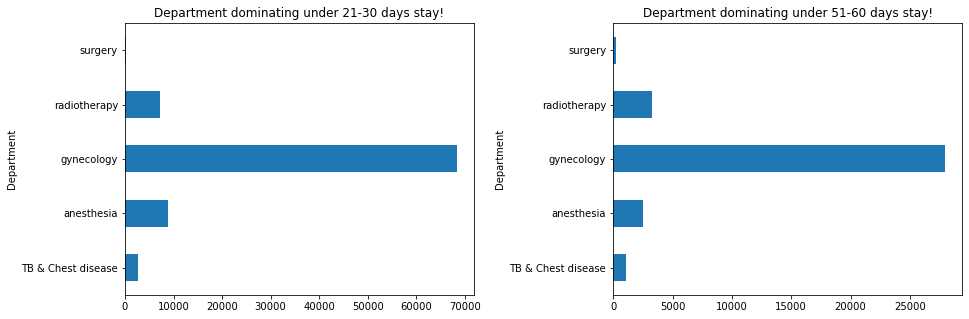

In [18]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4,hspace=0.3)
total_21_30.plot(kind = 'barh');
plt.title('Department dominating under 21-30 days stay!');
plt.subplot(1,2,2)
total_51_60.plot(kind = 'barh');
plt.title('Department dominating under 51-60 days stay!');

Gynecology is the dominating patient stay department

<AxesSubplot:>

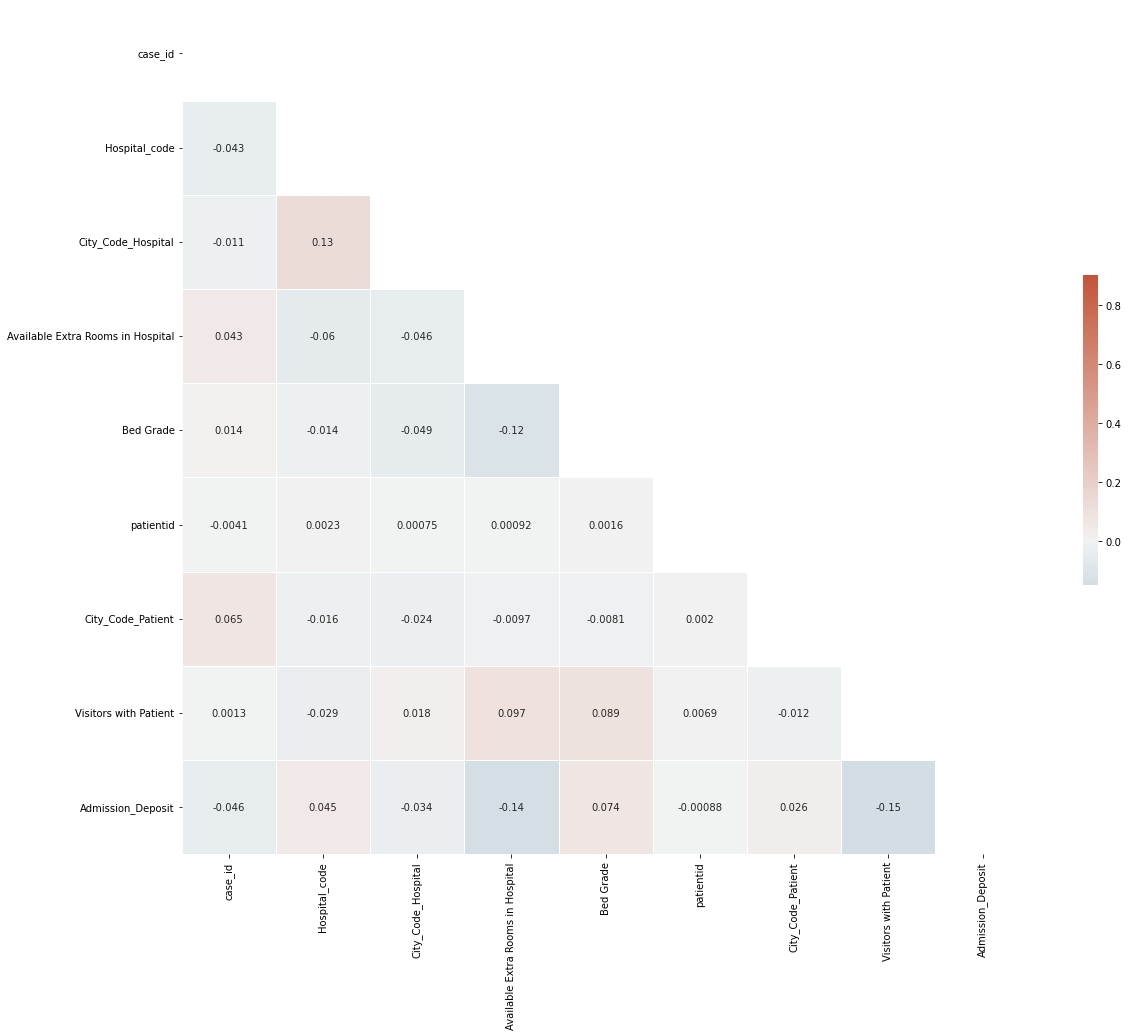

In [19]:
#correlation matrix
corr = data.corr()
# heatmap
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 19))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .3},annot=True)